In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('train.csv',index_col=0)
raw_data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [3]:
raw_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [4]:
data = raw_data.copy()
data['Sex'] = data['Sex'].map({'male':1, 'female':0})


In [5]:
# I drop Fare because it has multicolinearity with Embarked and Pclass
data.drop(columns=['Ticket', 'Cabin', 'Name', 'Fare', 'Embarked', 'Parch'], inplace=True)
# data.drop(columns=['Ticket', 'Cabin', 'Name', 'Fare', 'Embarked'], inplace=True)

In [6]:
data

Survived  Pclass  Sex   Age  SibSp
PassengerId                                    
1                   0       3    1  22.0      1
2                   1       1    0  38.0      1
3                   1       3    0  26.0      0
4                   1       1    0  35.0      1
5                   0       3    1  35.0      0
...               ...     ...  ...   ...    ...
887                 0       2    1  27.0      0
888                 1       1    0  19.0      0
889                 0       3    0   NaN      1
890                 1       1    1  26.0      0
891                 0       3    1  32.0      0

[891 rows x 5 columns]

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

# Checking age with different variables to fill missing values

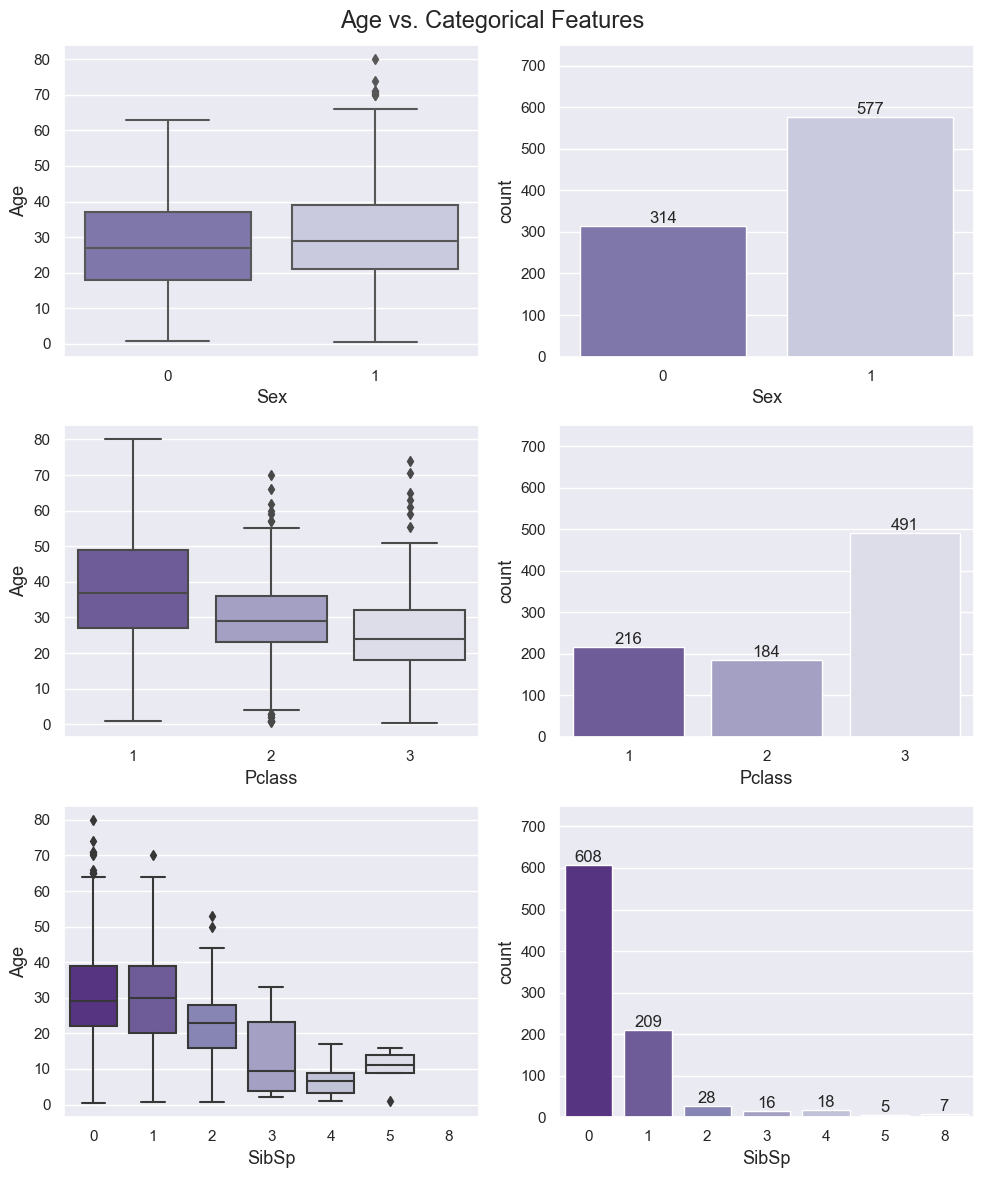

In [8]:
cat_features = ['Sex','Pclass','SibSp']

fig, ax = plt.subplots(3, 2, figsize=(10,12), dpi=100)

for idx, each_feature in enumerate(cat_features):
    # Plot Boxplot
    sns.boxplot(y='Age', x=each_feature, data=data, ax=ax[idx,0], palette='Purples_r')
    
    # Plot Countplot
    graph = sns.countplot(x=each_feature, data=data, ax=ax[idx,1], palette='Purples_r')
    ax[idx,1].set_ylim([0, 750])
    for cont in graph.containers:
        graph.bar_label(cont)
    
    # Set Axis Labels
    ax[idx,0].xaxis.label.set_size(13)
    ax[idx,0].yaxis.label.set_size(13)
    ax[idx,1].xaxis.label.set_size(13)
    ax[idx,1].yaxis.label.set_size(13)

plt.suptitle('Age vs. Categorical Features', fontsize=17)
plt.tight_layout()    
plt.show()

From the graphs above, it can be seen that Age has a different median value according to the different categories of Pcalss. There is also a large amount of samples in each category of PCalss. It seems that the missing values in Age can be imputed according to the median value of those samples with the same Pclass category. To be sure, we also check the correlation of features with Age:

In [9]:
age_corr = data.corr()['Age'].sort_values()
age_corr.drop('Age', inplace=True)
pd.DataFrame(age_corr.values, columns=['Correlation'], index=age_corr.keys())

Correlation
Pclass      -0.369226
SibSp       -0.308247
Survived    -0.077221
Sex          0.093254

As can be seen, Pclass has the largest absolute value of correlation with Age. Therefore, we made sure that we can impute the missing values in Age with the median value of Age of samples with the same Pclass category:

In [10]:
data.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [11]:
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.median()))

# Checking for more missing values and droping them

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
dtype: int64

In [13]:
data

Survived  Pclass  Sex   Age  SibSp
PassengerId                                    
1                   0       3    1  22.0      1
2                   1       1    0  38.0      1
3                   1       3    0  26.0      0
4                   1       1    0  35.0      1
5                   0       3    1  35.0      0
...               ...     ...  ...   ...    ...
887                 0       2    1  27.0      0
888                 1       1    0  19.0      0
889                 0       3    0  24.0      1
890                 1       1    1  26.0      0
891                 0       3    1  32.0      0

[891 rows x 5 columns]

In [14]:
data.describe()

Survived      Pclass         Sex         Age       SibSp
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.647587   29.066409    0.523008
std      0.486592    0.836071    0.477990   13.244532    1.102743
min      0.000000    1.000000    0.000000    0.420000    0.000000
25%      0.000000    2.000000    0.000000   22.000000    0.000000
50%      0.000000    3.000000    1.000000   26.000000    0.000000
75%      1.000000    3.000000    1.000000   37.000000    1.000000
max      1.000000    3.000000    1.000000   80.000000    8.000000

# Now doing logic regression

In [15]:
y = data['Survived']
x1 = data.loc[ : , data.columns != 'Survived']

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.441680
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Mon, 02 Jan 2023   Pseudo R-squ.:                  0.3367
Time:                        12:43:38   Log-Likelihood:                -393.54
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.427e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4954      0.511     10.763      0.000       4.495       6.496
Pclass        -1.2605      0.127     -9.935      0.000      -1.509      -1.012
Sex           -2.7410      0.195    -14.061      0.000      -3.123      -2.359
Age           -0.0439      0.008     -5.411      0.000      -0.060      -0.028
SibSp         -0.3704      0.104     -3.553      0.000      -0.575      -0.166
==============================================================================
"""

In [17]:
# The Parch and embarked have p-value greater than 0.05 so we should drop it but first lets check our model accuracy

In [18]:
results_log.pred_table()

array([[478.,  71.],
       [101., 241.]])

In [19]:
# Some neat formatting to read the table (better when seeing it for the first time)
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

Predicted 0  Predicted 1
Actual 0        478.0         71.0
Actual 1        101.0        241.0

# Testing data

In [20]:
test_raw_data = pd.read_csv('test.csv', index_col=0)
test_raw_data

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
...             ...                                           ...     ...   
1305              3                            Spector, Mr. Woolf    male   
1306              1                  Oliva y Ocana, Dona. Fermina  female   
1307              3                  Saether, Mr. Simon Sivertsen    male   
1308              3                           Ware, Mr. Frederick    male   
1309              3                      Peter, Master. Michael J    male   

              Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
PassengerId                                                                   
892          34.5      0      0              330911    7.8292   NaN        Q  
893          47.0      1      0              363272    7.0000   NaN        S  
894          62.0      0      0              240276    9.6875   NaN        Q  
895          27.0      0      0              315154    8.6625   NaN        S  
896          22.0      1      1             3101298   12.2875   NaN        S  
...           ...    ...    ...                 ...       ...   ...      ...  
1305          NaN      0      0           A.5. 3236    8.0500   NaN        S  
1306         39.0      0      0            PC 17758  108.9000  C105        C  
1307         38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1308          NaN      0      0              359309    8.0500   NaN        S  
1309          NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 10 columns]

In [21]:
test_data = test_raw_data.copy()
test_data['Sex'] = test_data['Sex'].map({'male':1, 'female':0})

In [22]:
# I drop Fare because it has multicolinearity with Embarked and Pclass
test_data.drop(columns=['Ticket', 'Cabin', 'Name', 'Fare', 'Embarked', 'Parch'], inplace=True)

In [23]:
x = sm.add_constant(test_data)

In [24]:
x

const  Pclass  Sex   Age  SibSp
PassengerId                                 
892            1.0       3    1  34.5      0
893            1.0       3    0  47.0      1
894            1.0       2    1  62.0      0
895            1.0       3    1  27.0      0
896            1.0       3    0  22.0      1
...            ...     ...  ...   ...    ...
1305           1.0       3    1   NaN      0
1306           1.0       1    0  39.0      0
1307           1.0       3    1  38.5      0
1308           1.0       3    1   NaN      0
1309           1.0       3    1   NaN      1

[418 rows x 5 columns]

In [25]:
predictions = results_log.predict(x)
pr = (predictions >= 0.5).astype(int)
final = pr.to_frame()

In [26]:
final.reset_index(inplace=True)
final.set_axis(['PassengerId', 'Survived'], axis='columns', inplace=True)
final

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [27]:
final['Survived'].value_counts()

0    284
1    134
Name: Survived, dtype: int64

# Saving results in CSV file

In [28]:
final.to_csv('Predictions.csv')